In [86]:
import os
import mrcnn
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
import tensorflow as tf
import imgaug.augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt


from os import listdir
from xml.etree import ElementTree
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
from numpy import zeros
from numpy import asarray
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from keras.models import load_model
get_ipython().run_line_magic('matplotlib', 'inline')
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.callbacks import TensorBoard

In [12]:
get_ipython().system('pip install keras==2.1.2')

In [13]:
get_ipython().system('pip list | grep Keras')

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
#pip install tensorflow==1.14

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install protobuf==3.20.*

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement protobuf==3.20.* (from versions: 2.0.0b0, 2.0.3, 2.3.0, 2.4.1, 2.5.0, 2.6.0, 2.6.1, 3.0.0a2, 3.0.0a3, 3.0.0b1, 3.0.0b1.post1, 3.0.0b1.post2, 3.0.0b2, 3.0.0b2.post1, 3.0.0b2.post2, 3.0.0b3, 3.0.0b4, 3.0.0, 3.1.0, 3.1.0.post1, 3.2.0rc1, 3.2.0rc1.post1, 3.2.0rc2, 3.2.0, 3.3.0, 3.4.0, 3.5.0.post1, 3.5.1, 3.5.2, 3.5.2.post1, 3.6.0, 3.6.1, 3.7.0rc2, 3.7.0rc3, 3.7.0, 3.7.1, 3.8.0rc1, 3.8.0, 3.9.0rc1, 3.9.0, 3.9.1, 3.9.2, 3.10.0rc1, 3.10.0, 3.11.0rc1, 3.11.0rc2, 3.11.0, 3.11.1, 3.11.2, 3.11.3, 3.12.0rc1, 3.12.0rc2, 3.12.0, 3.12.1, 3.12.2, 3.12.4, 3.13.0rc3, 3.13.0, 3.14.0rc1, 3.14.0rc2, 3.14.0rc3, 3.14.0, 3.15.0rc1, 3.15.0rc2, 3.15.0, 3.15.1, 3.15.2, 3.15.3, 3.15.4, 3.15.5, 3.15.6, 3.15.7, 3.15.8, 3.16.0rc1, 3.16.0rc2, 3.16.0, 3.17.0rc1, 3.17.0rc2, 3.17.0, 3.17.1, 3.17.2, 3.17.3, 3.18.0rc1, 3.18.0rc2, 3.18.0, 3.18.1, 3.18.3, 3.19.0rc1, 3.19.0rc2, 3.19.0, 3.19.1, 3.19.2, 3.19.3, 3.19.4, 3.19.5, 3.19.6, 4.0.0rc1, 4.0.0rc2, 4.21.0rc1,

In [6]:
#get_ipython().system('pip install tensorflow==2.5.0 --ignore-installed')

In [15]:
get_ipython().system('pip install h5py==2.10.0')

In [16]:
get_ipython().system('pip install imgaug')

In [51]:
get_ipython().system('python setup.py install')
get_ipython().system('pip install scikit-image')
get_ipython().system('pip install imutils')
get_ipython().system('pip install opencv-python')

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info\PKG-INFO
writing dependency_links to mask_rcnn.egg-info\dependency_links.txt
writing top-level names to mask_rcnn.egg-info\top_level.txt
reading manifest file 'mask_rcnn.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mask_rcnn.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\config.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\model.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\parallel_model.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\utils.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\visualize.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\__init__.py -> build\bdist.win-amd64\egg\mrcnn
byte-compiling

C:\Users\sukru\anaconda3\envs\myenv23\lib\site-packages\setuptools\dist.py:720: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt)
C:\Users\sukru\anaconda3\envs\myenv23\lib\site-packages\setuptools\dist.py:720: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt)
C:\Users\sukru\anaconda3\envs\myenv23\lib\site-packages\setuptools\dist.py:720: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt)
zip_safe flag not set; analyzing archive contents...


In [55]:

x = 0
for num, flname in enumerate(os.listdir('C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection\\images\\')): 
    fn = flname
    flname = flname[:-4]
    x=x+1
    src ="C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection\\images\\"+ fn 
    dst ="C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection\\images\\"+ str(x)+ '.png'   
    src2 ="C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection\\annotations\\"+ flname + '.xml' 
    dst2 ="C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection\\annotations\\"+ str(x) + '.xml'    
   
    os.rename(src, dst) 
    os.rename(src2, dst2)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection\\images\\10.png' -> 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection\\images\\2.png'

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
print(tf.__version__)

1.13.1


In [58]:
get_ipython().system('git clone https://github.com/matterport/Mask_RCNN.git')
get_ipython().system('cd Mask_RCNN')

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [59]:

current_folder = os.getcwd()
print(current_folder)
os.chdir('Mask_RCNN')

C:\Users\sukru\Mask_RCNN


In [60]:
get_ipython().system('wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5')
get_ipython().system('ls -lh mask_rcnn_coco.h5')

'wget' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [61]:

class myMaskRCNNConfig(Config):
    
    #Name of the Configuration
    
    NAME = "Crypt Detection"
    
    #Give a value to the GPU and number of images per GPU
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
    # Number of classes
    
    NUM_CLASSES = 1+1
    
    STEPS_PER_EPOCH = 5
    
    LEARNING_RATE=0.006
    
    # Minimum confidence detection should not be less than 90%
    DETECTION_MIN_CONFIDENCE = 0.9
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=10



In [62]:
config= myMaskRCNNConfig()

In [63]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.006
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [64]:
print("Loading Mask R-CNN model...")
model = modellib.MaskRCNN(mode="training", config=config, model_dir='./')

Loading Mask R-CNN model...


In [65]:
model.keras_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [66]:
class SetC(Dataset):
   # Load datasets
    def lset(self, dataset_dir, is_train=True):
        
        # A class is added
        self.add_class("dataset", 1, "method")
        
        
        images_dir = dataset_dir + '/images/'
        annotations_dir = dataset_dir + '/annotations/'
        n = 0
        
        for filename in listdir(images_dir):
            
            # Finding image id
            image_id = filename[:-4]
            n=n+1
            
           
            if is_train and int(n) >= 58:
                continue
            
            if not is_train and int(n) < 51:
                continue
            

            img_path = images_dir + filename
            
        
            ann_path = annotations_dir + image_id + '.xml'
            
            # images and annotations are added to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
            
    def boxt(self, filename):
        
       
        tree = ElementTree.parse(filename)
       
        root = tree.getroot()
        # Finding each bounding box
        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        
        # Finding Image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

   
    def load_mask(self, image_id):
       
        info = self.image_info[image_id]
        
        # File location of annotation
        path = info['annotation']
        
       
        boxes, w, h = self.boxt(path)
       
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('method'))
        return masks, asarray(class_ids, dtype='int32')

    
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        print(info)
        return info['path']


In [67]:
augmentation = iaa.Sometimes(0.9, [
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5)
])

In [68]:
train_set = SetC()
train_set.lset('C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

test_set = SetC()
test_set.lset('C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 57
Test: 9


In [73]:
model.load_weights('C:\\Users\\sukru\\Desktop\\New folder\\new\\Mask_RCNN\\mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])


In [74]:

model.load_weights("C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\model-weights\\crypt-newobj.h5", by_name=True)


In [75]:
test_set.image_info

[{'id': '55',
  'source': 'dataset',
  'path': 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection/images/55.png',
  'annotation': 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection/annotations/55.xml'},
 {'id': '56',
  'source': 'dataset',
  'path': 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection/images/56.png',
  'annotation': 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection/annotations/56.xml'},
 {'id': '57',
  'source': 'dataset',
  'path': 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection/images/57.png',
  'annotation': 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection/annotations/57.xml'},
 {'id': '58',
  'source': 'dataset',
  'path': 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection/images/58.png',
  'annotation': 'C:\\Users\\sukr

In [76]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=40, layers='heads')
history = model.keras_model.history.history


Starting at epoch 0. LR=0.006

Checkpoint Path: ./crypt detection20221210T0639\mask_rcnn_crypt detection_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4   

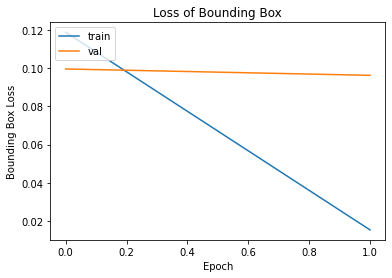

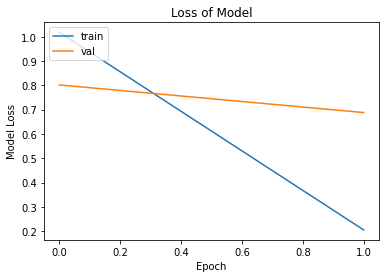

In [77]:
import matplotlib.pyplot as plt
# Accuracy History

plt.plot(history['mrcnn_bbox_loss'])
plt.plot(history['val_mrcnn_bbox_loss'])
plt.title('Loss of Bounding Box')
plt.ylabel('Bounding Box Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Loss History

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss of Model')
plt.ylabel('Model Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [78]:
model.keras_model.save_weights("C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection\\newobj.h5")


In [79]:
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
model.load_weights("C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection\\newobj.h5", by_name=True)

In [80]:
p = load_img("C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection\\images\\24.png")
p = img_to_array(p)
dt= model.detect([p])

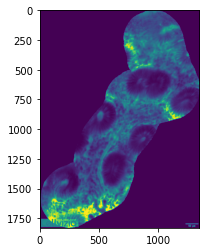

In [81]:
plt.imshow(p[:,:,1])

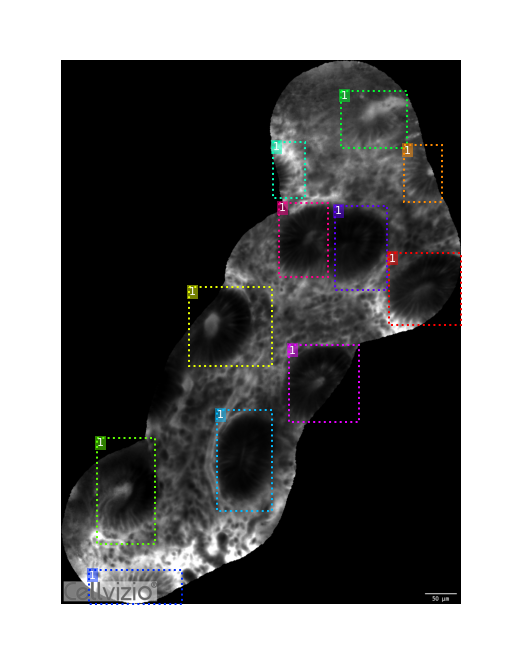

In [82]:
r=dt[0]
visualize.draw_boxes(p, boxes=r['rois'], captions=r['class_ids'])

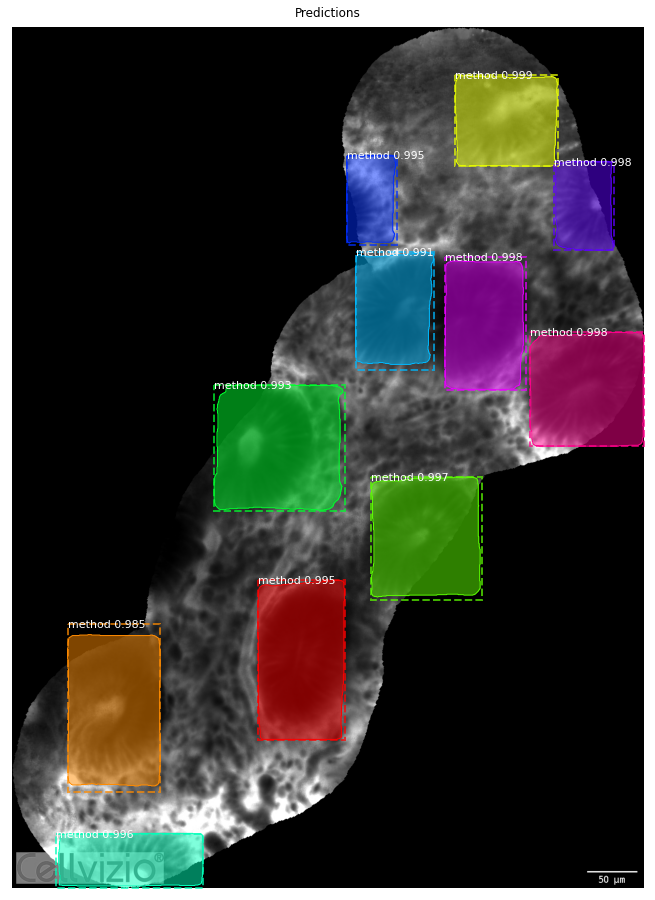

In [83]:
r=dt[0]
visualize.display_instances(p, r['rois'], r['masks'], r['class_ids'], 
                            test_set.class_names, r['scores'], 
                            title="Predictions")

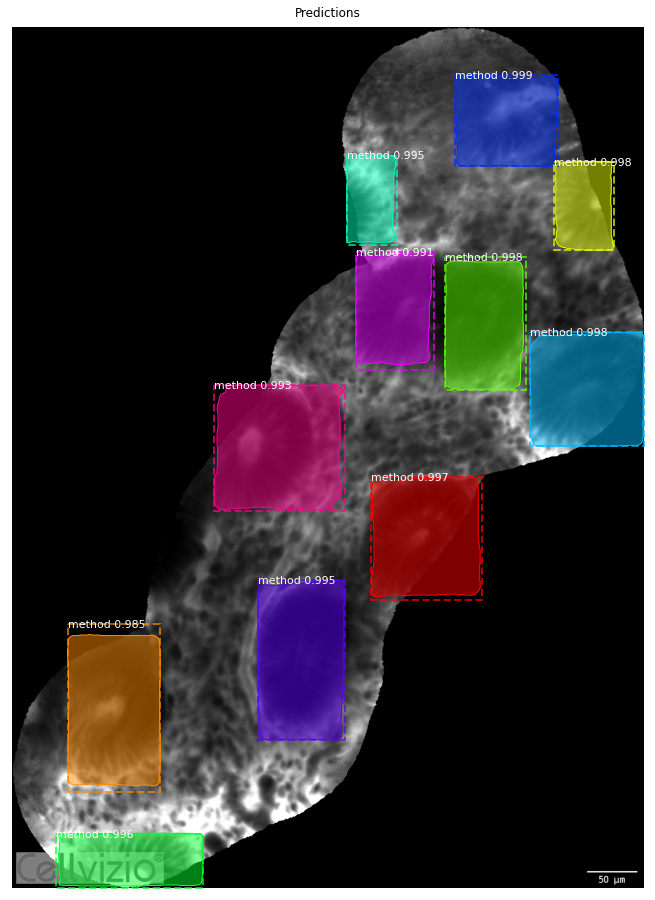

In [84]:
r=dt[0]
visualize.display_instances(p, r['rois'], r['masks'], r['class_ids'], 
                            test_set.class_names, r['scores'], 
                            title="Predictions")

{'id': '59', 'source': 'dataset', 'path': 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection/images/59.png', 'annotation': 'C:\\Users\\sukru\\Desktop\\New folder\\new\\drive\\My Drive\\method\\objectdetection/annotations/59.xml'}
image ID: dataset.59 (4) C:\Users\sukru\Desktop\New folder\new\drive\My Drive\method\objectdetection/images/59.png
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


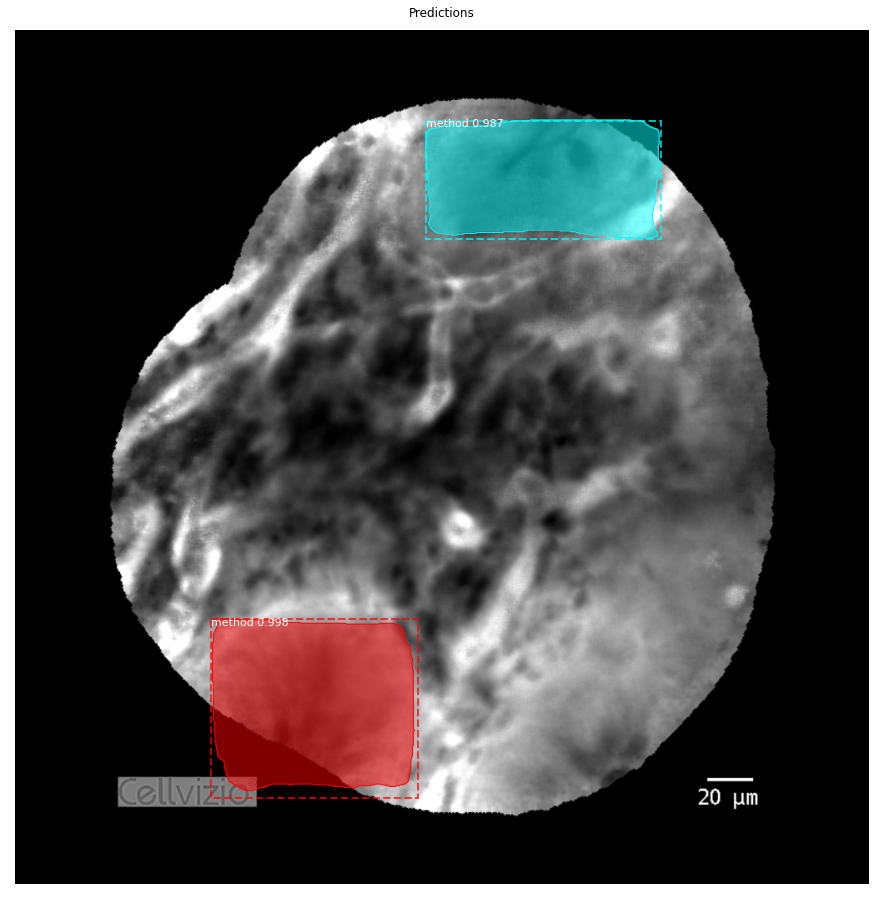

In [85]:
image_id = 4
image, image_meta, gt_class_id, gt_bbox, gt_mask =    modellib.load_image_gt(test_set, config, image_id, use_mini_mask=False)
info = test_set.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       test_set.image_reference(image_id)))

dts = model.detect([image], verbose=1)


r = dts[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            test_set.class_names, r['scores'], 
                            title="Predictions")
